Assignment on Classification

1.Read the dataset to python environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('iris 2.csv')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2.Do the necessary pre-processing steps

In [4]:
data.shape

(150, 5)

In [5]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
for i in ['SL','SW','PL','PW']:
  data[i]=data[i].fillna(data[i].mean())


In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

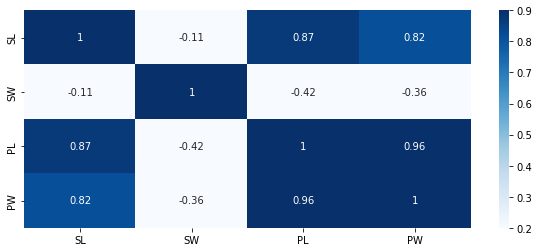

In [10]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

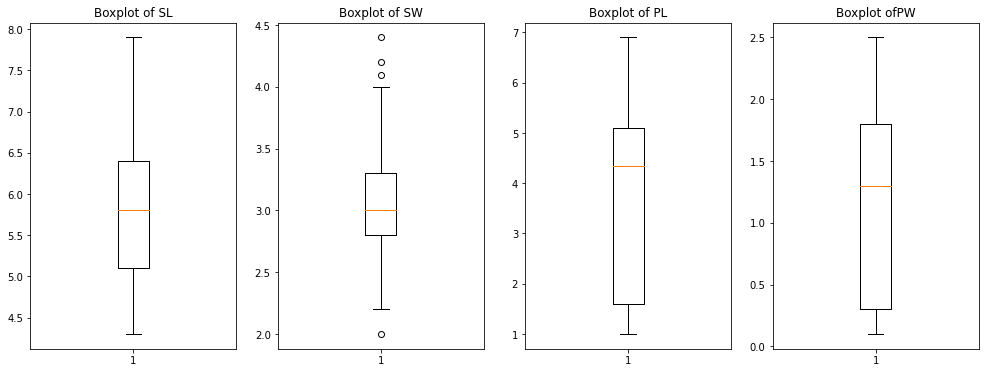

In [11]:
plt.figure(figsize=(17,6))
plt.subplot(1,4,1)
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')
plt.subplot(1,4,2)
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')
plt.subplot(1,4,3)
plt.boxplot(data['PL'])
plt.title('Boxplot of PL')
plt.subplot(1,4,4)
plt.boxplot(data['PW'])
plt.title('Boxplot ofPW')
plt.show()

In [12]:
### lower quartile (Q1),median (Q2), upper quartile (Q3)
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [13]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [14]:
###Inter quartile range
IQR=Q3-Q1
IQR

0.5

In [15]:
###Upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [16]:
print(low_lim)
print(upp_lim)

2.05
4.05


In [17]:
###Outliers
outlier=[]
for x in data['SW']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [18]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [19]:
###index value with outliers
index = data[(data['SW']>upp_lim)|(data['SW']<low_lim)].index

In [20]:
index


Int64Index([15, 32, 33, 60], dtype='int64')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder=LabelEncoder()

In [23]:
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [24]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
x1=data.drop(['Classification'],axis=1)

In [26]:
x1.describe

<bound method NDFrame.describe of       SL   SW   PL   PW
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]>

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1=min_max_scaler.fit_transform(x1)
type(x1)
x1=pd.DataFrame(x1,columns=['SL','SW','PL','PW'])
data1=data.drop(['SL','SW','PL','PW'],axis=1)
data1

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [28]:
data1=pd.concat([data1,x1],axis=1)
data1.describe()

,Classification,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,0.428704,0.439167,0.467571,0.457778
std,0.819232,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.222222,0.333333,0.101695,0.083333
50%,1.000000,0.416667,0.416667,0.567797,0.500000
75%,2.000000,0.583333,0.541667,0.694915,0.708333
max,2.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
###split test and train data 

In [30]:
X=data1.drop(['Classification'],axis=1)
y=data1['Classification']


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor_model=lor.fit(X_train,y_train)
y_predict_lor=lor_model.predict(X_test)

In [34]:
y_predict_lor

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,y_predict_lor)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [37]:
from sklearn.metrics import precision_score,recall_score

In [38]:
precision_score(y_test,y_predict_lor,pos_label=1,average='micro')

0.9666666666666667

In [39]:
recall_score(y_test,y_predict_lor,pos_label=1,average='micro')

0.9666666666666667

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_lor)

0.9666666666666667

kNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
metric_k=[]
neighbors=range(3,20)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [43]:
metric_k

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

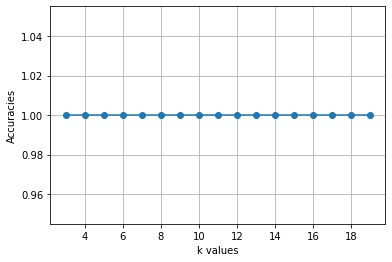

In [44]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [45]:
classifier= KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [47]:
precision_score(y_test,y_pred_kNN,pos_label=1,average='micro')

1.0

In [48]:
recall_score(y_test,y_pred_kNN,pos_label=1,average='micro')

1.0

In [49]:
accuracy_score(y_test,y_pred_kNN)

1.0

SVM classification

In [50]:
from sklearn.svm import SVC

In [51]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [52]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [53]:
precision_score(y_test,y_pred_svm,pos_label=1,average='micro')

1.0

In [54]:
recall_score(y_test,y_pred_svm,pos_label=1,average='micro')

1.0

In [55]:
accuracy_score(y_test,y_pred_svm)

1.0

In [56]:
svm_clf2=SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [57]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [58]:
precision_score(y_test,y_pred_svm2,pos_label=1,average='micro')

1.0

In [59]:
recall_score(y_test,y_pred_svm2,pos_label=1,average='micro')

1.0

In [60]:
accuracy_score(y_test,y_pred_svm2)

1.0

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_clf= DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [63]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [64]:
precision_score(y_test,y_pred_dt,pos_label=1,average='micro')

1.0

In [65]:
recall_score(y_test,y_pred_dt,pos_label=1,average='micro')

1.0

In [66]:
accuracy_score(y_test,y_pred_dt)

1.0

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [69]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [70]:
precision_score(y_test,y_pred_rf,pos_label=1,average='micro')

1.0

In [71]:
recall_score(y_test,y_pred_rf,pos_label=1,average='micro')

1.0

In [72]:
accuracy_score(y_test,y_pred_rf)

1.0